## 230B hw4

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fftpack import fft, fftshift
from commpy.filters import rrcosfilter
from ece230b import *

## Question 4: channel impulse response

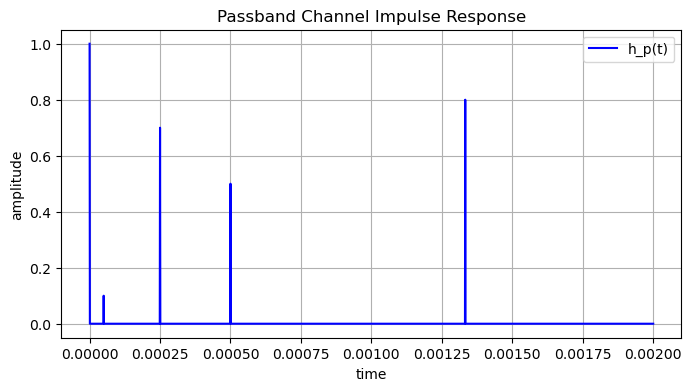

In [2]:
T = 1e-3  # period
fc = 1e4 # sampling frequency

# Generate passband channel impulse response
t = np.linspace(0, 2*T, 2001)
h_p = np.zeros(len(t))
h_p[0] = 1 # impulse at t=0
h_p[np.argmin(abs(t-T/20))] = 1/10 # impulse at t=T/20
h_p[np.argmin(abs(t-T/4))] = 7/10 # impulse at t=T/4
h_p[np.argmin(abs(t-T/2))] = 1/2 # impulse at t=T/2
h_p[np.argmin(abs(t-4*T/3))] = 4/5 # impulse at t=4*T/3

# Plot passband channel impulse response
%matplotlib inline
plt.figure(figsize=(8, 4))
plt.plot(t, h_p, color='blue', label='h_p(t)')
plt.title("Passband Channel Impulse Response")
plt.xlabel("time")
plt.ylabel("amplitude")
plt.grid()
plt.legend()
plt.show()


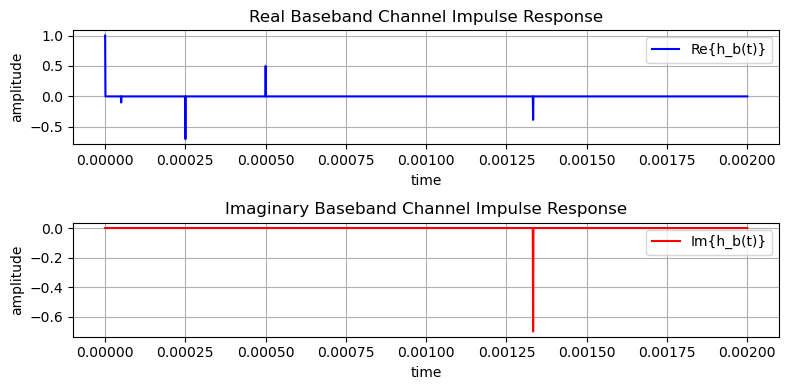

In [3]:
# Demodulate to baseband
h_b = h_p * np.e ** (-1j * 2 * np.pi * fc * t)

# Plot
plt.figure(figsize=(8, 4)) 
plt.subplot(2, 1, 1)
plt.plot(t, h_b.real, color='blue', label='Re{h_b(t)}')
plt.title("Real Baseband Channel Impulse Response")
plt.xlabel("time")
plt.ylabel("amplitude")
plt.grid()
plt.legend()
plt.subplot(2, 1, 2)
plt.plot(t, h_b.imag, color='red', label='Im{h_b(t)}')
plt.title("Imaginary Baseband Channel Impulse Response")
plt.xlabel("time")
plt.ylabel("amplitude")
plt.grid()
plt.legend()
plt.tight_layout()
plt.show()



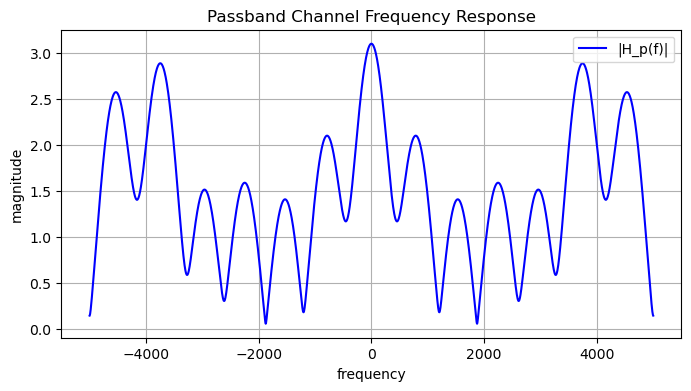

In [4]:
# Passband frequency response
f = np.linspace(-fc/2, fc/2, len(t))
H_p = 1 + 1/10 * np.exp(-1j * 2 * np.pi * f * T/20) + \
    7/10 * np.exp(-1j * 2 * np.pi * f * T/4) + \
    1/2 * np.exp(-1j * 2 * np.pi * f * T/2) + \
    4/5 * np.exp(-1j * 2 * np.pi * f * 4*T/3)

# Plot
plt.figure(figsize=(8, 4))
plt.plot(f, np.abs(H_p), color='blue', label='|H_p(f)|')
plt.title("Passband Channel Frequency Response")
plt.xlabel("frequency")
plt.ylabel("magnitude")
plt.grid()
plt.legend()


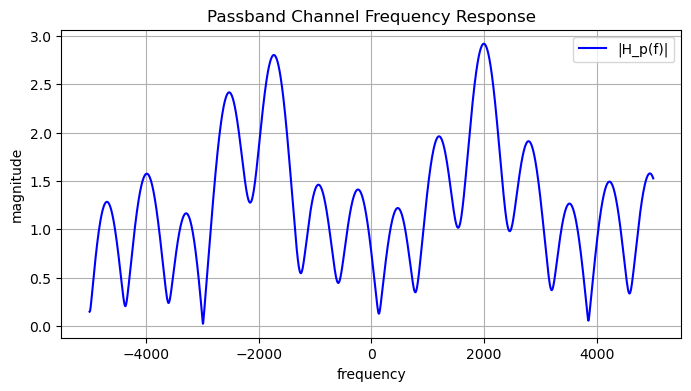

In [10]:
# Baseband frequency response
H_b = 1 + 1/10 * np.exp(-1j * 2 * np.pi * T/20 * (f+fc)) + \
    7/10 * np.exp(-1j * 2 * np.pi * T/4 * (f+fc)) + \
    1/2 * np.exp(-1j * 2 * np.pi * T/2 * (f+fc)) + \
    4/5 * np.exp(-1j * 2 * np.pi * 4*T/3 * (f+fc))

# Plot
plt.figure(figsize=(8, 4))
plt.plot(f, np.abs(H_b), color='blue', label='|H_p(f)|')
plt.title("Passband Channel Frequency Response")
plt.xlabel("frequency")
plt.ylabel("magnitude")
plt.grid()
plt.legend()


## Question 5: MOE of raised cosine rolloff

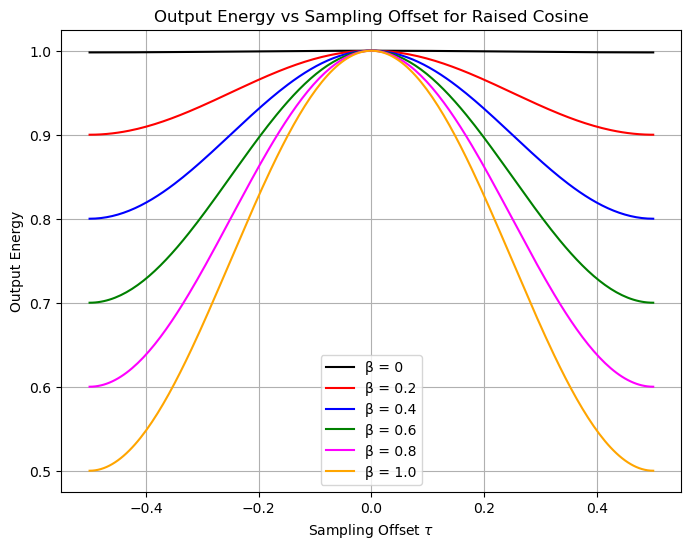

In [26]:
def raised_cosine(t, T, beta):
    p = np.zeros_like(t)
    for i in range(len(t)):
        if t[i] == 0:
            p[i] = 1.0
        elif beta != 0 and abs(t[i]) == T / (2 * beta):
            p[i] = (np.pi / 4) * np.sinc(1 / (2 * beta))
        else:
            numerator = np.sinc(t[i] / T) * np.cos(np.pi * beta * t[i] / T)
            denominator = 1 - (2 * beta * t[i] / T) ** 2
            p[i] = numerator / denominator
    return p

# Parameters
T = 1.0
taus = np.linspace(-0.5 * T, 0.5 * T, 200)
L = 100  # Sum from l = -L to L
l_vals = np.arange(-L, L+1)
betas = [0, 0.2, 0.4, 0.6, 0.8, 1.0]
colors = ['black', 'red', 'blue', 'green', 'magenta', 'orange']

# Prepare plot
plt.figure(figsize=(8, 6))

# Calculate and plot MOE for each beta
for beta, color in zip(betas, colors):
    moe = []
    for tau in taus:
        t_vals = l_vals * T + tau
        p_vals = raised_cosine(t_vals, T, beta)
        energy = np.sum(np.abs(p_vals) ** 2)
        moe.append(energy)
    plt.plot(taus / T, moe, label=f'β = {beta}', color=color)

plt.xlabel('Sampling Offset $\\tau$')
plt.ylabel('Output Energy')
plt.title('Output Energy vs Sampling Offset for Raised Cosine')
plt.grid(True)
plt.legend()
plt.show()